In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# np.random.seed(100)


## Initialization of a Simple Neural Network

In [ ]:
"""
This code is setting up a simple neural network with one hidden layer.
It initializes the training data, weights, and biases for the network.
"""

x_train = np.linspace(-3, 3, 1000)
y_train = x_train**2

weights_of_hiddenLayer = np.random.uniform(-1,1,100)
weights_of_outputLayer = np.random.uniform(-1,1,100)

bias_of_hiddenLayer = np.random.rand(100)
bias_of_outputLayer = np.random.rand(1)

weights_of_hiddenLayer = weights_of_hiddenLayer.reshape((100,1))
weights_of_outputLayer = weights_of_outputLayer.reshape((100,1))
bias_of_hiddenLayer = bias_of_hiddenLayer.reshape((100,1))
bias_of_outputLayer = bias_of_outputLayer.reshape((1,1))

## Implementation of Softmax, ReLU, and Sigmoid Activation Functions

In [ ]:
"""
This code defines a class "activationFunctions" that implements three common activation functions
used in neural networks: softmax, ReLU, and sigmoid.
"""

class activationFunctions:
  def softmax(self, x):
    return np.exp(x) / np.sum(np.exp(x))

  def ReLU(self, x):
    return np.maximum(0, x)

  def leaky_ReLU(self, x):
    return np.maximum(0.01*x, x)

  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

  def softmax_derivative(self, softmax):
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

  def relu_derivative(self, x):
    return np.where(x > 0, 1, 0)

  def leaky_relu_derivative(self, x):
    return np.where(x > 0, 1, 0.01)


## Implementation of Cross-Entropy Loss and Mean Squared Error (MSE) in a Loss Class

In [ ]:
"""
This code defines a `Loss` class that implements two common loss functions used in machine learning:
cross-entropy loss and mean squared error (MSE).
"""

class Loss:
  def __init__(self, y, output):
    self.y = y
    self.output = output

  def cross_entropy_loss(self):
    return -np.sum(self.y * np.log(self.output))

  def MSE(self):
    return np.mean(np.square(self.y - self.output))

## MLP Neural Network Class with Training and Prediction Methods

In [ ]:
"""
This code defines a class `MLP` (Multi-Layer Perceptron) that implements a simple neural network with one hidden layer and
methods for forward propagation, backpropagation, training, prediction, and accuracy calculation.
"""

class MLP:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases

  def forward(self, x):
    aF = activationFunctions()
    self.z_of_hiddenLayer = np.dot(x, self.weights[0]) + self.biases[0]
    self.output_of_hiddenLayer = aF.ReLU(self.z_of_hiddenLayer)
    z_of_outputLayer = np.dot(self.weights[1].T, self.output_of_hiddenLayer) + self.biases[1]
    self.output_of_outputLayer = z_of_outputLayer
    return self.output_of_outputLayer


  def backward(self, x, y, loss_derivative):
    aF = activationFunctions()
    self.weights_gradient = [np.zeros_like(w) for w in self.weights]
    self.biases_gradient = [np.zeros_like(b) for b in self.biases]

    dloss = self.output_of_outputLayer - y
    doutput_dz_output = dloss
    layer2_weights_gradiants = dloss * self.output_of_hiddenLayer
    relu_derivation = aF.relu_derivative(self.z_of_hiddenLayer)
    layer1_weights_gradiants = relu_derivation * dloss * self.weights[1] * x

    self.weights_gradient[0] = layer1_weights_gradiants
    self.weights_gradient[1] = layer2_weights_gradiants

    self.biases_gradient[0] = dloss * self.weights[1] * relu_derivation
    self.biases_gradient[1] = dloss
    return self.weights_gradient, self.biases_gradient


  def train(self, x, y, epochs, learning_rate):
    losses = []
    for epoch in range(epochs):
        loss_sum = 0
        for xi, yi in zip(x, y):
            output = self.forward(xi)
            lossClass = Loss(yi, output[0][0])
            loss = lossClass.MSE()
            loss_sum += loss
            weights_gradient, biases_gradient = self.backward(xi, yi, output)
            self.weights[1] -= learning_rate * weights_gradient[1]
            self.biases[1] -= learning_rate * biases_gradient[1]
            self.weights[0] -= learning_rate * weights_gradient[0]
            self.biases[0] -= learning_rate * biases_gradient[0]

        avg_loss = loss_sum / len(x)
        losses.append(avg_loss)

        if epoch % 10 == 0:
            print('Epoch %d loss: %.2f' % (epoch, avg_loss))

    return losses

  def predict(self, x, y, learning_rate):
    predicted = []
    for xi, yi in zip(x, y):
      output = self.forward(xi)
      predicted.append(output[0][0])

    return predicted


## Training the MLP Neural Network

In [ ]:
mlp = MLP([weights_of_hiddenLayer, weights_of_outputLayer], [bias_of_hiddenLayer, bias_of_outputLayer])
learning = 0.01
losses = mlp.train(x_train, y_train, epochs=100, learning_rate=learning)
predicted = mlp.predict(x_train, y_train, learning_rate=learning)

Epoch 0 loss: 14.96
Epoch 10 loss: 0.06
Epoch 20 loss: 0.01
Epoch 30 loss: 0.01
Epoch 40 loss: 0.01
Epoch 50 loss: 0.01
Epoch 60 loss: 0.01
Epoch 70 loss: 0.01
Epoch 80 loss: 0.01
Epoch 90 loss: 0.00


## Plot Loss

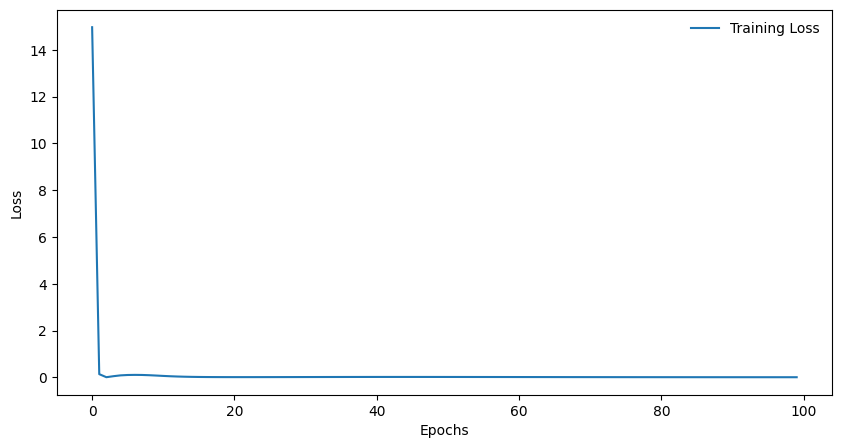

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(losses, label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.show()

# Plot Accuracy

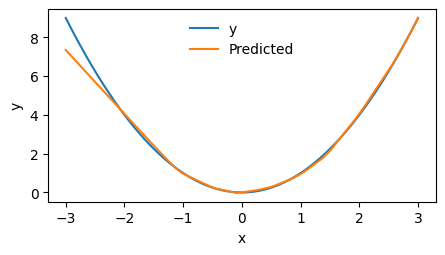

In [ ]:
plt.figure(figsize=(5,2.5))
plt.plot(x_train, y_train, label='y')
plt.plot(x_train, predicted, label='Predicted')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(frameon=False)
plt.show()